In [7]:
import glob
import os
import librosa
import librosa.display
import numpy as np
from matplotlib import pyplot as plt

PARENT_DIR = "/Users/mbare/Documents/audana-dataset/dataset/Audio/"
SUB_DIRS = ["Truthful","Deceptive"]

In [8]:
def fex(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    return chroma


def parse_audio_files(parent_dir,sub_dirs,file_ext="*.wav"):
    # array with dimension = mfccs.shape + chroma.shape
    features, labels = np.empty((0,12)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, 
                                         sub_dir, 
                                         file_ext)):
            try:
                chroma = fex(fn)
            except Exception as e:
              print ("Error encountered while parsing file: %s", fn)
              continue
            ext_features = np.hstack([chroma])
            features = np.vstack([features,ext_features])
            labels = np.append(labels, [1 if sub_dir=="Deceptive" else 0])
    return np.array(features), np.array(labels, dtype = np.int)

In [9]:
features, labels = parse_audio_files(PARENT_DIR, SUB_DIRS)

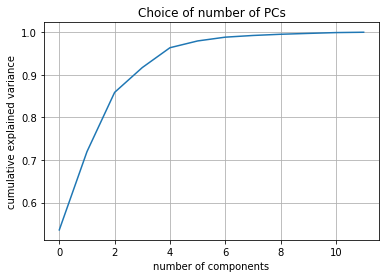

In [10]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Choice of number of PCs')
plt.grid(True)

In [11]:
from sklearn.preprocessing import StandardScaler

standardized_features = StandardScaler().fit_transform(features)
reduced_pca = PCA(n_components=4)
principal_components = reduced_pca.fit_transform(standardized_features)
print(principal_components.shape)
print(labels.shape)

(121, 4)
(121,)


In [12]:
import pandas as pd

df_features = pd.DataFrame(data=features)
df_labels = pd.DataFrame(data=labels, columns=['label'])
df_features_and_labels = pd.concat([df_features, df_labels['label']], axis=1)
df_features_and_labels.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,label
116,0.522188,0.502324,0.477780,0.502185,0.583943,0.697440,0.699333,0.657837,0.633348,0.618245,0.535261,0.503383,1
117,0.694828,0.690556,0.657120,0.653022,0.617551,0.610847,0.581469,0.584137,0.625026,0.624868,0.621213,0.645981,1
118,0.560937,0.568390,0.553677,0.580499,0.604580,0.662368,0.729838,0.756027,0.716345,0.691740,0.657973,0.583232,1
119,0.541171,0.566872,0.536944,0.547835,0.551300,0.633421,0.676887,0.727658,0.702815,0.659791,0.630659,0.565615,1
120,0.657511,0.610039,0.599384,0.550504,0.533021,0.517022,0.539248,0.546552,0.565787,0.611721,0.644859,0.666211,1


In [13]:
pc_df = pd.DataFrame(data=principal_components, columns=['pc 1', 'pc 2', 'pc 3', 'pc 4'])
pc_df = pd.concat([pc_df, df_labels['label']], axis = 1)
pc_df.head(5)

,pc 1,pc 2,pc 3,pc 4,label
0,3.087889,1.496144,0.978442,0.112267,0
1,-1.597754,2.688727,0.534352,0.690874,0
2,3.519427,1.277749,-2.383027,-0.064439,0
3,-2.200291,-0.019665,0.041933,0.350933,0
4,-2.487794,-2.555118,0.476228,-0.923779,0


Truthful 0
Deceptive 1


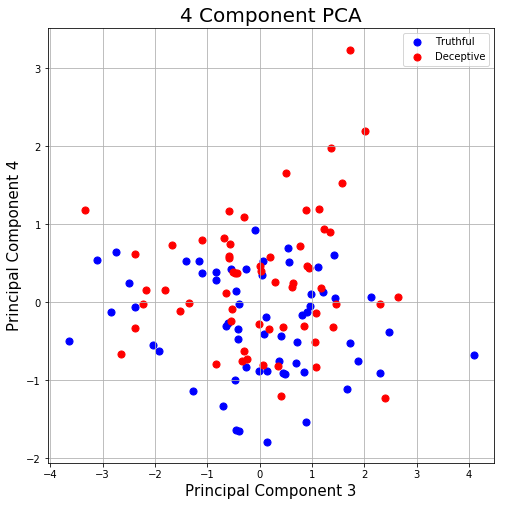

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 15)
ax.set_ylabel('Principal Component 4', fontsize = 15)
ax.set_title('4 Component PCA', fontsize = 20)

hr_labels = SUB_DIRS
num_labels = [0,1]
for l,n in zip(hr_labels, num_labels):
    print(l,n)
colors = ['b', 'r']
for label, color in zip(num_labels,colors):
    indicesToKeep = pc_df['label'] == label
    ax.scatter(pc_df.loc[indicesToKeep, 'pc 3'],
               pc_df.loc[indicesToKeep, 'pc 4'],
               c = color,
               s = 50)
ax.legend(hr_labels)
ax.grid()